In [18]:
%matplotlib inline
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

df_FOI = pd.read_csv('FOI_BI.txt', sep='|', header=0, encoding='ISO-8859-1', error_bad_lines=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (33,34,35,37,38,39,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
col_name = list(df_FOI.columns.values)
line_num = df_FOI.shape[0]
print('In the MDR FOI data, there are {} records in total.'.format(line_num))
print('Also deleting invalid columns (100% missing values).\n')
bad_columns = []
for b in col_name:
    n = df_FOI[b].isnull().sum()
    if n >= 0.95 * line_num:
        del df_FOI[b]
        bad_columns.append(b)
    else:
        print(b, 'missing :', n, 'out of', line_num, ',', n/line_num)
print('\nInvalid columns:', bad_columns)

In the MDR FOI data, there are 25846 records in total.
Also deleting invalid columns (100% missing values).

MDR_REPORT_KEY missing : 0 out of 25846 , 0.0
REPORT_NUMBER missing : 0 out of 25846 , 0.0
REPORT_SOURCE_CODE missing : 0 out of 25846 , 0.0
MANUFACTURER_LINK_FLAG_ missing : 0 out of 25846 , 0.0
DATE_RECEIVED missing : 0 out of 25846 , 0.0
ADVERSE_EVENT_FLAG missing : 1002 out of 25846 , 0.0387680879053
PRODUCT_PROBLEM_FLAG missing : 1486 out of 25846 , 0.0574943898476
DATE_REPORT missing : 2602 out of 25846 , 0.100673218293
DATE_OF_EVENT missing : 6659 out of 25846 , 0.257641414532
REPROCESSED_AND_REUSED_FLAG missing : 21536 out of 25846 , 0.833243055018
REPORTER_OCCUPATION_CODE missing : 2606 out of 25846 , 0.100827981119
HEALTH_PROFESSIONAL missing : 2380 out of 25846 , 0.0920838814517
INITIAL_REPORT_TO_FDA missing : 6304 out of 25846 , 0.243906213727
DATE_FACILITY_AWARE missing : 15346 out of 25846 , 0.593747581831
REPORT_DATE missing : 14055 out of 25846 , 0.543797879749
R

In [20]:
col_name = list(df_FOI.columns.values)
for b in col_name:
    n = df_FOI[b].nunique()
    print(b, 'unique value :', n)

MDR_REPORT_KEY unique value : 25836
REPORT_NUMBER unique value : 25821
REPORT_SOURCE_CODE unique value : 4
MANUFACTURER_LINK_FLAG_ unique value : 2
DATE_RECEIVED unique value : 4253
ADVERSE_EVENT_FLAG unique value : 3
PRODUCT_PROBLEM_FLAG unique value : 3
DATE_REPORT unique value : 4734
DATE_OF_EVENT unique value : 7106
REPROCESSED_AND_REUSED_FLAG unique value : 3
REPORTER_OCCUPATION_CODE unique value : 29
HEALTH_PROFESSIONAL unique value : 5
INITIAL_REPORT_TO_FDA unique value : 5
DATE_FACILITY_AWARE unique value : 4682
REPORT_DATE unique value : 2660
REPORT_TO_FDA unique value : 5
DATE_REPORT_TO_FDA unique value : 1977
EVENT_LOCATION unique value : 18
DATE_REPORT_TO_MANUFACTURER unique value : 1360
MANUFACTURER_CONTACT_F_NAME unique value : 122
MANUFACTURER_CONTACT_L_NAME unique value : 174
MANUFACTURER_CONTACT_STREET_1 unique value : 217
MANUFACTURER_CONTACT_STREET_2 unique value : 41
MANUFACTURER_CONTACT_CITY unique value : 111
MANUFACTURER_CONTACT_STATE unique value : 24
MANUFACTUR

Report source code:
P = Voluntary report
U = User Facility report
D = Distributor report
M = Manufacturer report


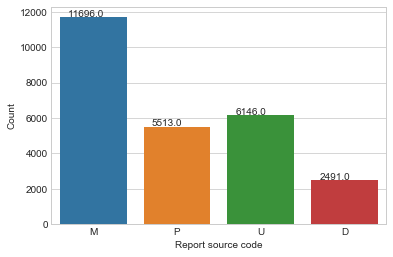

In [25]:
sns.set_style("whitegrid")
print("""Report source code:
P = Voluntary report
U = User Facility report
D = Distributor report
M = Manufacturer report""")
ax = sns.countplot(x='REPORT_SOURCE_CODE', data=df_FOI)
plt.xlabel('Report source code')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Manufacturer Link Flag:
Y = Yes
N = No


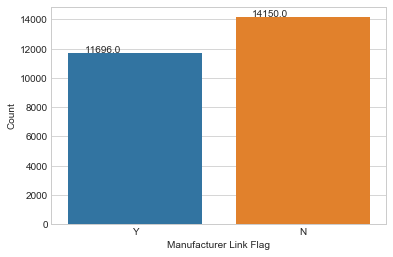

In [54]:
print("""Manufacturer Link Flag:
Y = Yes
N = No""")
ax = sns.countplot(x='MANUFACTURER_LINK_FLAG_', data=df_FOI)
plt.xlabel('Manufacturer Link Flag')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Adverse Event Flag:
Y = Yes
N = No
* = Invalid


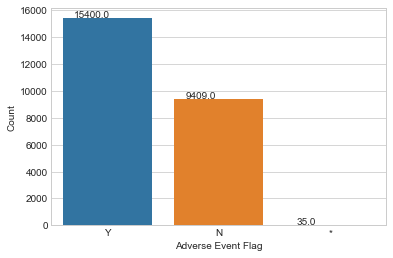

In [55]:
print("""Adverse Event Flag:
Y = Yes
N = No
* = Invalid""")
ax = sns.countplot(x='ADVERSE_EVENT_FLAG', data=df_FOI)
plt.xlabel('Adverse Event Flag')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Product Problem Flag:
Y = Yes
N = No
* = Invalid


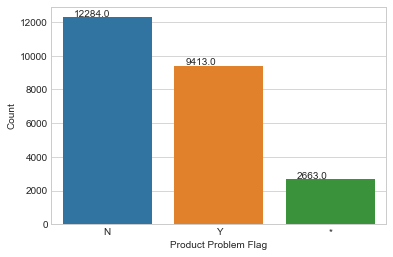

In [56]:
print("""Product Problem Flag:
Y = Yes
N = No
* = Invalid""")
ax = sns.countplot(x='PRODUCT_PROBLEM_FLAG', data=df_FOI)
plt.xlabel('Product Problem Flag')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Reprocessed And Reused Flag:
Y = Yes
N = No
* = Invalid


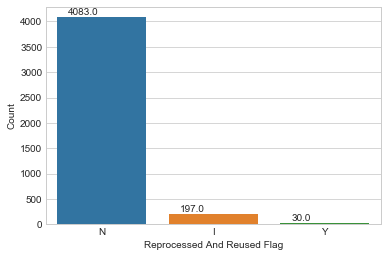

In [57]:
print("""Reprocessed And Reused Flag:
Y = Yes
N = No
* = Invalid""")
ax = sns.countplot(x='REPROCESSED_AND_REUSED_FLAG', data=df_FOI)
plt.xlabel('Reprocessed And Reused Flag')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [39]:
print("""Reporter Occupation Code:
* = INVALID DATA
000 = OTHER
001 = PHYSICIAN
002 = NURSE
0HP = HEALTH PROFESSIONAL
0LP = LAY USER/PATIENT
CST = ?
100 = OTHER HEALTH CARE PROFESSIONAL
102 = DENTAL HYGIENIST
105 = MEDICAL TECHNOLOGIST
109 = PHARMACIST
112 = PHYSICIAN ASSISTANT
115 = SPEECH THERAPIST
300 = OTHER CAREGIVERS
301 = DENTAL ASSISTANT
303 = MEDICAL ASSISTANT
304 = NURSING ASSISTANT
305 = PATIENT
306 = PATIENT FAMILY MEMBER OR FRIEND
401 = BIOMEDICAL ENGINEER
403 = MEDICAL EQUIPMENT COMPANY TECHNICIAN/REPRESENTATIVE
405 = SERVICE PERSONNEL
500 = RISK MANAGER
600 = ATTORNEY
999 = UNKNOWN
NI = NO INFORMATION
UNK = UNKNOWN""")
df_FOI['REPORTER_OCCUPATION_CODE'].value_counts()

Reporter Occupation Code:
* = INVALID DATA
000 = OTHER
001 = PHYSICIAN
002 = NURSE
0HP = HEALTH PROFESSIONAL
0LP = LAY USER/PATIENT
CST = ?
100 = OTHER HEALTH CARE PROFESSIONAL
102 = DENTAL HYGIENIST
105 = MEDICAL TECHNOLOGIST
109 = PHARMACIST
112 = PHYSICIAN ASSISTANT
115 = SPEECH THERAPIST
300 = OTHER CAREGIVERS
301 = DENTAL ASSISTANT
303 = MEDICAL ASSISTANT
304 = NURSING ASSISTANT
305 = PATIENT
306 = PATIENT FAMILY MEMBER OR FRIEND
401 = BIOMEDICAL ENGINEER
403 = MEDICAL EQUIPMENT COMPANY TECHNICIAN/REPRESENTATIVE
405 = SERVICE PERSONNEL
500 = RISK MANAGER
600 = ATTORNEY
999 = UNKNOWN
NI = NO INFORMATION
UNK = UNKNOWN


001    5964
600    4665
500    2489
002    2469
000    2460
305    2290
*      1723
UNK     762
NI      143
100     136
306      50
401      24
999      18
109       8
1         8
0HP       6
CST       3
105       3
303       3
2         3
301       2
102       2
0LP       2
112       2
304       1
115       1
300       1
405       1
403       1
Name: REPORTER_OCCUPATION_CODE, dtype: int64

Health Professional:
Y = Yes
U = Unknown;
N = No;
I = No information at this time
* = Invalid


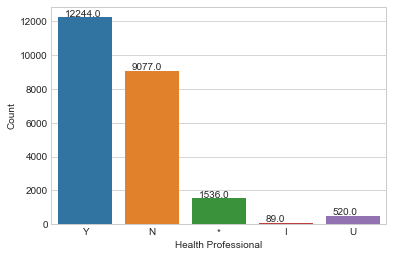

In [58]:
print("""Health Professional:
Y = Yes
U = Unknown;
N = No;
I = No information at this time
* = Invalid""")
ax = sns.countplot(x='HEALTH_PROFESSIONAL', data=df_FOI)
plt.xlabel('Health Professional')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Initial Report To Fda:
Y = Yes
U = Unknown;
N = No;
I = No information at this time
* = Invalid


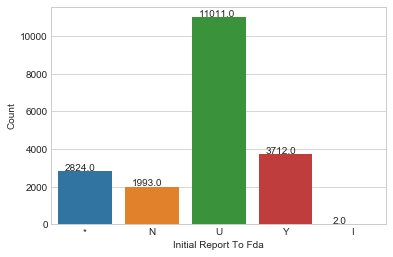

In [59]:
print("""Initial Report To Fda:
Y = Yes
U = Unknown;
N = No;
I = No information at this time
* = Invalid""")
ax = sns.countplot(x='INITIAL_REPORT_TO_FDA', data=df_FOI)
plt.xlabel('Initial Report To Fda')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Report To Fda:
Y = Yes
U = Unknown;
N = No;
I = No information at this time
* = Invalid


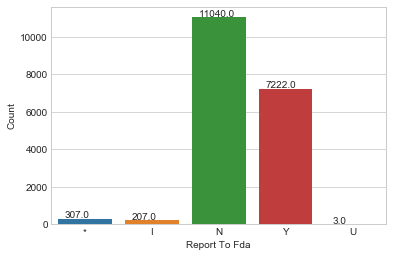

In [60]:
print("""Report To Fda:
Y = Yes
U = Unknown;
N = No;
I = No information at this time
* = Invalid""")
ax = sns.countplot(x='REPORT_TO_FDA', data=df_FOI)
plt.xlabel('Report To Fda')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [47]:
print("""Event Location:
* = INVALID DATA
000 = OTHER
001 = HOSPITAL
002 = HOME
003 = NURSING HOME
004 = OUTPATIENT TREATMENT FACILITY
005 = OUTPATIENT DIAGNOSTIC FACILITY
006 = AMBULATORY SURGICAL FACILITY
500 = HOSPITAL
508 = OPERATING ROOM
509 = OUTPATIENT CLINIC/SURGERY
600 = AMBULATORY HEALTH CARE FACILITY
601 = AMBULATORY SURGICAL CENTER
999 = UNKNOWN
NI/I = NO INFORMATION
UNK/U = UNKNOWN""")
df_FOI['EVENT_LOCATION'].value_counts()

Event Location:
* = INVALID DATA
000 = OTHER
001 = HOSPITAL
002 = HOME
003 = NURSING HOME
004 = OUTPATIENT TREATMENT FACILITY
005 = OUTPATIENT DIAGNOSTIC FACILITY
006 = AMBULATORY SURGICAL FACILITY
500 = HOSPITAL
508 = OPERATING ROOM
509 = OUTPATIENT CLINIC/SURGERY
600 = AMBULATORY HEALTH CARE FACILITY
601 = AMBULATORY SURGICAL CENTER
999 = UNKNOWN
NI/I = NO INFORMATION
UNK/U = UNKNOWN


UNK    4906
001    3710
006    3153
*      2585
999    1395
000     761
NI      728
002     684
I       311
005      47
004      36
601      13
600       6
508       5
500       5
003       2
U         1
509       1
Name: EVENT_LOCATION, dtype: int64

Single Use Flag:
Y = Yes
N = No
I = No information at this time
* = Invalid


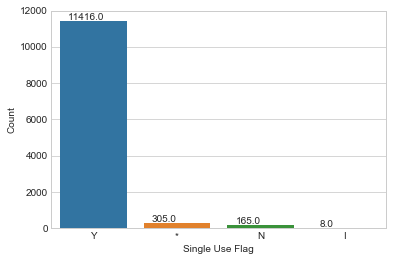

In [61]:
print("""Single Use Flag:
Y = Yes
N = No
I = No information at this time
* = Invalid""")
ax = sns.countplot(x='SINGLE_USE_FLAG', data=df_FOI)
plt.xlabel('Single Use Flag')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Previous Use Code:
I = No information at this time
N = No
R = Device was returned to manufacturer
* = No answer provided
U = Unknown


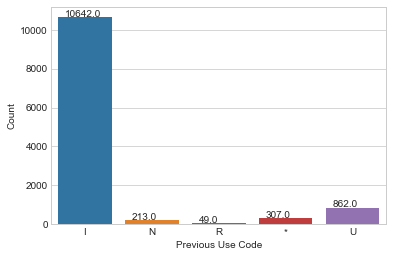

In [62]:
print("""Previous Use Code:
I = No information at this time
N = No
R = Device was returned to manufacturer
* = No answer provided
U = Unknown""")
ax = sns.countplot(x='PREVIOUS_USE_CODE', data=df_FOI)
plt.xlabel('Previous Use Code')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Event Type:
D = Death
IN = Injury
IL = Injury
IJ = Injury
M = Malfunction
O = Other
* = No answer provided


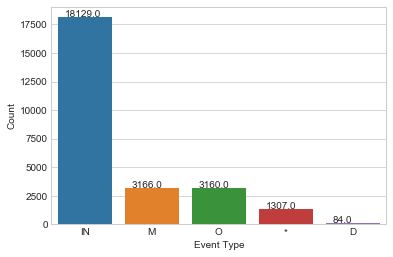

In [53]:
print("""Event Type:
D = Death
IN = Injury
IL = Injury
IJ = Injury
M = Malfunction
O = Other
* = No answer provided""")
ax = sns.countplot(x='EVENT_TYPE', data=df_FOI)
plt.xlabel('Event Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Type Of Report:
I = Initial submission
F = Followup
X = Extra copy received
O = Other information submitted


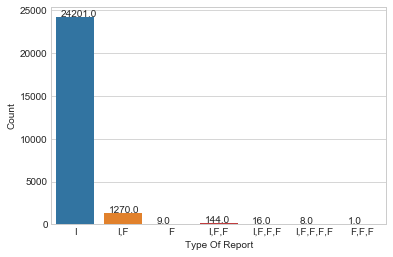

In [64]:
print("""Type Of Report:
I = Initial submission
F = Followup
X = Extra copy received
O = Other information submitted""")
ax = sns.countplot(x='TYPE_OF_REPORT', data=df_FOI)
plt.xlabel('Type Of Report')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [66]:
print("Event Location: showing top 30")
df_FOI['SOURCE_TYPE'].value_counts().nlargest(30)

Event Location: showing top 30


04                               4063
00                               2627
08                               1733
05                               1721
06                                340
99                                227
07                                178
05,06                             115
05,08                              88
FOREIGN,HEALTH PROFESSIONAL,L      84
05,07                              53
01,05                              49
01,05,06,07                        38
02,04                              35
03,05                              35
04,05                              27
00,05                              25
05,06,07                           24
01,03,05                           23
COMPANY REPRESENTATIVE,HEALTH      23
HEALTH PROFESSIONAL,LITERATUR      21
FOREIGN,HEALTH PROFESSIONAL        18
05,HEALTH PROFESSIONAL             17
COMPANY REPRESENTATIVE,FOREIG      15
02,04,05                           12
01,07                              11
00,01       